# Observations and Insights 
# 1) Propriva drug regimen had considerably less measurement counts than the rest of the drug regimen. 
# 2) Capomulin & Ramicane had the greatest number of measurement counts and also had the lowest tumor volume average.
# 3) In teh Capomulin drug regimen, the trend seems to be the higher the avg weight of the mice, the higher the tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
# Combine the data into a single dataset
combined_csv = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
combined_csv
# print(mouse_metadata["Mouse ID"].count())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print((combined_csv["Mouse ID"].nunique()))
print((combined_csv["Mouse ID"].count()))

249
1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# find & remove duplicates: https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/

duplicate_ids = combined_csv.loc[combined_csv.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_ids)     


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_csv.loc[combined_csv["Mouse ID"] =="g989"]
# combined_csv.loc[combined_csv["Mouse ID"] =="b128"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_csv = combined_csv[combined_csv["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_csv.count())
print(clean_csv.nunique())

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64
Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Regimen= clean_csv.groupby("Drug Regimen")

# summary_stats = Regimen["Tumor Volume (mm3)"].describe()

Mean = Regimen["Tumor Volume (mm3)"].mean()
Median = Regimen["Tumor Volume (mm3)"].median()
var = Regimen["Tumor Volume (mm3)"].var()
st_dev = Regimen["Tumor Volume (mm3)"].std()
sem = Regimen["Tumor Volume (mm3)"].sem()




Stats_Tumor_Volume = pd.DataFrame({"Tumor_vol_mean": Mean, 
                                   "Tumor_vol_median":Median, 
                                   "Tumor_vol_var":var,
                                   "Tumor_vol_std":st_dev,
                                   "Tumor_vol_sem":sem})
Stats_Tumor_Volume

,Tumor_vol_mean,Tumor_vol_median,Tumor_vol_var,Tumor_vol_std,Tumor_vol_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# func_list = [np.mean, np.median, np.var, np.std]
# 
regimen_agg = clean_csv.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})
regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

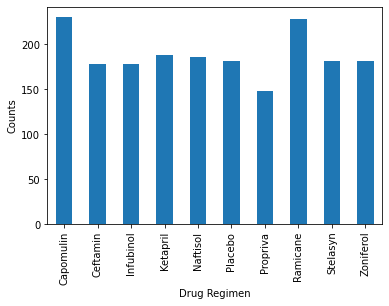

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_Regimen = Regimen["Drug Regimen"].count()
count_Regimen
count_chart = count_Regimen.plot(kind = "bar")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel('Counts')

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Measurement Count')

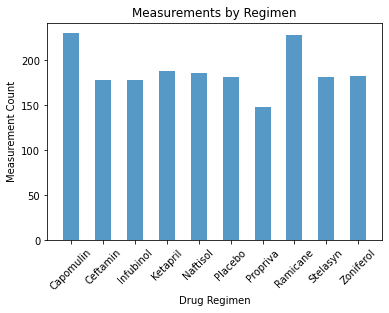

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count_Regimen = Regimen["Drug Regimen"].count()
x_axis = np.arange(0, len(count_Regimen))

tick_locations= []
for x in x_axis:
    tick_locations.append(x)

plt.xlim(-.75, len(count_Regimen)-.25)
    
plt.bar(x_axis, count_Regimen, width = .5, alpha = .75, align = "center")

plt.xticks(tick_locations,count_Regimen.index.values)
plt.xticks(rotation = 45)
plt.title("Measurements by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")

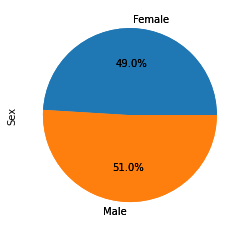

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender = clean_csv.groupby("Sex")
Gender_count = Gender["Sex"].count()
Gender_count

Gender_count.plot(kind = "pie", y = Gender_count, autopct="%1.1f%%")
Gender_count.plot.pie(y='Sex',autopct='%1.1f%%')

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

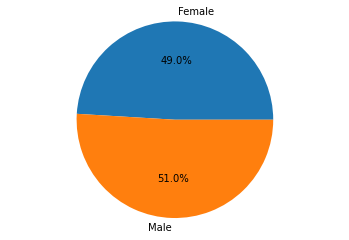

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender = clean_csv.groupby("Sex")
Gender_count = Gender["Sex"].count().tolist()
labels = ["Female", "Male"]
Gender_count
plt.pie(Gender_count,autopct='%1.1f%%', labels = labels)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# this method couldn't figure out how to limit to just the 4 regimen
# max_timepoint = clean_csv.loc[clean_csv.groupby("Mouse ID", sort = False).Timepoint.idxmax()]
# max_timepoint
# max_timepoint.head().reset_index()

# max_timepoint_grouped = max_timepoint.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
# max_timepoint_grouped

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
specific_regimen = clean_csv[clean_csv["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])]
sorted_timepoints = specific_regimen.sort_values(["Timepoint"], ascending = True)
sorted_timepoints

last_timepoints_grouped = sorted_timepoints.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']
last_timepoints_grouped.head()

Vol_by_Regimen = last_timepoints_grouped.to_frame()
Vol_by_Regimen.head()

# last_timepoints_grouped = sorted_timepoints.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']
# last_timepoints_grouped.head()

# Capomulin = clean_csv.loc[clean_csv["Drug Regimen"] == "Capomulin",:]
# Capomulin_max = Capomulin.groupby("Mouse ID").max()["Timepoint"]
# Capomulin_vol = pd.DataFrame(Capomulin_max)
# Capomulin_merge = pd.merge(Capomulin_vol, clean_csv, on =("Mouse ID", "Timepoint"), how = "left")
# Capomulin_merge.head()





# drug_regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# tumor_vol = []
# for regimen in drug_regimen:
#     value = max_timepoint.loc[max_timepoint["Drug Regimen"]==drug_regimen]
# tumor_volume = max_timepoint.
# max_timepoint = max_timepoint.set_index("Drug Regimen")
# max_timepoint

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

last_timepoints_transposed = Vol_by_Regimen.stack(level=0).unstack(level = 0)
last_timepoints_transposed



drug_regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# for drug in drug_regimen:



Vol_by_Regimen_reset = Vol_by_Regimen.reset_index()
Vol_by_Regimen_reset
tumor_vol = Vol_by_Regimen.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_vol


four_reg = pd.DataFrame(tumor_vol)
four_reg


tumor_volumes = [drug for drug in four_reg['Tumor Volume (mm3)']]
tumor_volumes
# for drug in drug_regimen:

#     tumor_vol_max = tumor_vol.groupby("Mouse ID").max()["Timepoint"]
#     tumor_volume = pd.DataFrame(tumor_vol_max)
#     tumor_volume_merge = pd.merge(tumor_volume, clean_csv, on =("Mouse ID", "Timepoint"), how = "left")
# tumor_volume_merge.head()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
counter  = 0

for regimen in drug_regimen:
    quarters =last_timepoints_transposed[regimen].quantile([.25, .5,.75])
    lowerq = quarters[.25]
    upperq = quarters[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    if counter == 0:
        print(f'\n')
    print(f"{regimen} IQR data is:")
    print(f"The lower quartile of {regimen} is: {lowerq}")
    print(f"The upper quartile of {regimen} is: {upperq}")
    print(f"The interquartile range of {regimen} is: {iqr}")
    print(f"The the median of {regimen} is: {quarters[0.5]} ")
    print(f"Values below {lower_bound} for {regimen} could be outliers.")
    print(f"Values above {upper_bound} for {regimen} could be outliers.")
    print(f'\n')
    counter += 1

    

# # #     # Determine outliers using upper and lower bounds
# IQR_analysis = four_reg["Tumor Volume (mm3)"].sort_values(ascending = True)
# IQR_analysis
# IQR = st.iqr(IQR_analysis, interpolation = "midpoint")
# print(IQR)

# quartiles = tumor_volumes.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"{lowerq}")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)





Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.


Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.


Infubinol IQR data is:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.

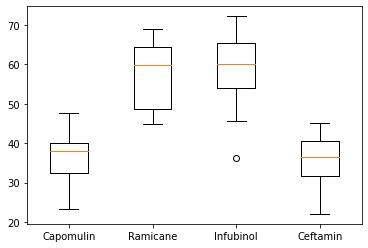

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = drug_regimen)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Vol')

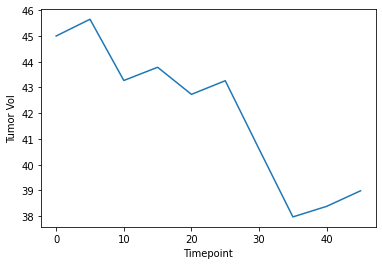

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
vol_time = clean_csv[clean_csv["Mouse ID"].isin(["b128"])]
vol_time

x_axis = vol_time["Timepoint"]
y_axis = vol_time["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol")

Text(0, 0.5, 'Avg Weight')

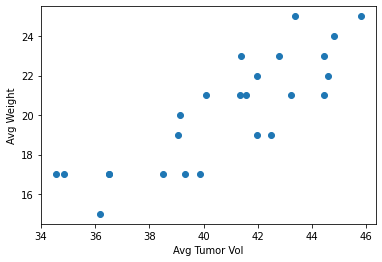

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol_weight = clean_csv[clean_csv["Drug Regimen"].isin(["Capomulin"])]
avg_vol_weight_grouped = avg_vol_weight.groupby(["Mouse ID"]).mean()
avg_vol_weight_grouped

plt.scatter(avg_vol_weight_grouped["Tumor Volume (mm3)"], avg_vol_weight_grouped["Weight (g)"])
plt.xlabel("Avg Tumor Vol")
plt.ylabel("Avg Weight")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_vol_weight_grouped["Tumor Volume (mm3)"], avg_vol_weight_grouped["Weight (g)"])[0],2)
print({correlation})

{0.84}


y = 0.74x + -10.15


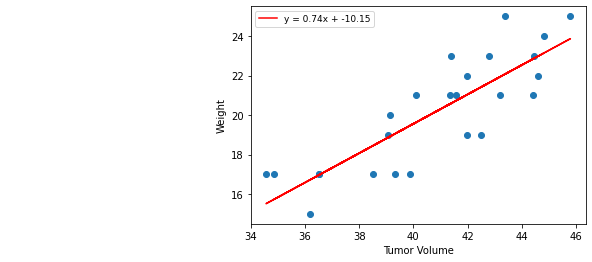

In [42]:
x_values = avg_vol_weight_grouped["Tumor Volume (mm3)"]
y_values = avg_vol_weight_grouped["Weight (g)"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", label =line_eq)
plt.annotate(line_eq,(25,15),fontsize=15,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.legend(fontsize=9)
plt.show()
